# IMPORTING LIBRARIES

In [1]:
import warnings
warnings.filterwarnings("ignore")
#so that warnings don't pop up

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#required libraries for performing activity on dataset

# UNDERSTANDING DATASET

In [37]:
previousapp_df = pd.read_csv(r"C:\Users\dhruv\Downloads\previous_application.csv")
application_df = pd.read_csv(r"C:\Users\dhruv\Downloads\application_data.csv")

In [6]:
previousapp_df.head()
#having a look at the top rows to get understanding of the dataset

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
previousapp_df.info()
#basic info about the particular datset (i.e: dtype, columns,etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [9]:
previousapp_df.shape
#dataset has 1670214 rows and 37 columns

(1670214, 37)

# DATA FILTERING

In [12]:
##finding columns having the most missing values
previousapp_df.count()
prev_miss = previousapp_df.isna()
prev_miss.head() ##right now the dtype is object because isna() returns a boolean answer

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,True,True,True,True,True


In [18]:
miss_percent = prev_miss.sum()
miss_percent

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [24]:
missing = miss_percent/len(previousapp_df)*100
missing.sort_values(ascending=False)
#here 'missing' becomes a new dataset holding percentage of missing values in each column


RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [26]:
##need to drop RATE_INTEREST_PRIVILEGED and RATE_INTEREST_PRIMARY as 99% of there data is missing
previousapp_df.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'],axis = 1,inplace = True)

In [27]:
##therefore we can also drop the rows for AMT_CREDIT and PRODUCT_COMBINATION as the percentage for missing values is very low
previousapp_df.dropna(subset=['AMT_CREDIT','PRODUCT_COMBINATION'],inplace = True)

In [28]:
##doing check for applied above functions
previousapp_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [33]:
##Exctracting columns containing only numeric values
##Numeric columns will help us in checking out the co-orelation,outliers,etc.
num = []
for c in previousapp_df.columns:
    if previousapp_df[c].dtype == float or previousapp_df[c].dtype == int:
        num.append(c)
        
print(num)

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [41]:
##correlation between different numeric values
numinprev_df = pd.DataFrame()

for c in num:
    numinprev_df[c] = previousapp_df[c]
    
numinprev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   AMT_ANNUITY                1297979 non-null  float64
 1   AMT_APPLICATION            1670214 non-null  float64
 2   AMT_CREDIT                 1670213 non-null  float64
 3   AMT_DOWN_PAYMENT           774370 non-null   float64
 4   AMT_GOODS_PRICE            1284699 non-null  float64
 5   RATE_DOWN_PAYMENT          774370 non-null   float64
 6   CNT_PAYMENT                1297984 non-null  float64
 7   DAYS_FIRST_DRAWING         997149 non-null   float64
 8   DAYS_FIRST_DUE             997149 non-null   float64
 9   DAYS_LAST_DUE_1ST_VERSION  997149 non-null   float64
 10  DAYS_LAST_DUE              997149 non-null   float64
 11  DAYS_TERMINATION           997149 non-null   float64
 12  NFLAG_INSURED_ON_APPROVAL  997149 non-null   float64
dtypes: float64(1

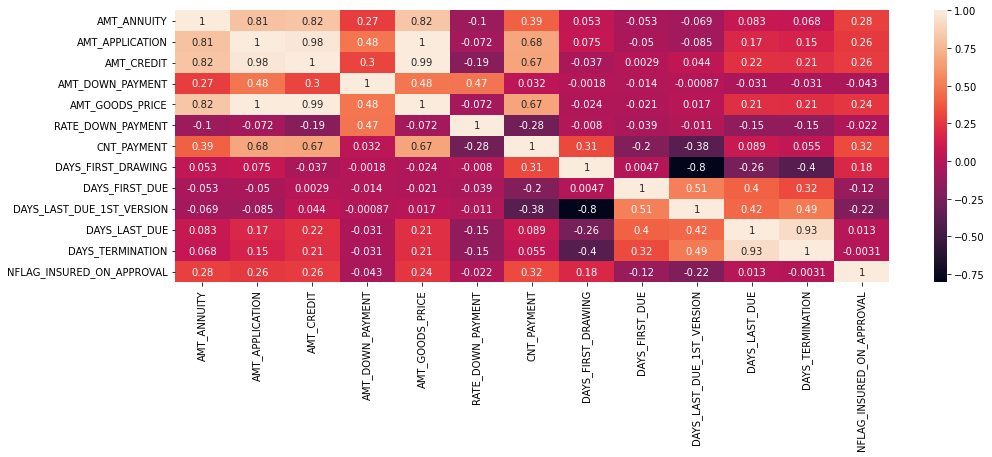

In [46]:
#using heatmap for finding exact a defined correlation
plt.figure(figsize=(16,5))
sns.heatmap(numinprev_df.corr(),annot =True)
plt.show()



After seeing the heatmap we can find that AMT_ANNUITY ,AMT_APPLICATION,AMT_CREDIT, AMT_GOODS_PRICE are highly correlated to each other that means that they will not provide any variance in our output when put through a model  for determination of loan application.

Also DAYS_LAST_DUE and DAYS_TERMINATION act as having the same values. These also comes under multicollinearity hence there it undermines the statistical significance of an independent variable. Hence these columns can be dropped in further analysis for simplification.

##Since both the dataset are too big for running together 
##we are going to only merge required columns 
##SK_ID_CURR and
##Target Variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
##SK_ID_PREV we can remove this column as this is of no use due to unique values everytime

In [47]:
previousapp_df.drop(['SK_ID_PREV'], axis=1, inplace=True)

In [48]:
previousapp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1670214 non-null  int64  
 1   NAME_CONTRACT_TYPE           1670214 non-null  object 
 2   AMT_ANNUITY                  1297979 non-null  float64
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   AMT_DOWN_PAYMENT             774370 non-null   float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  RATE_DOWN_PAYMENT            774370 non-null   float64
 12  RATE_INTEREST_PRIMARY        5951 non-null

In [49]:
merged_df = pd.merge(application_df[['SK_ID_CURR', 'TARGET']] , previousapp_df, how='left', on=['SK_ID_CURR'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1430155 non-null  int64  
 1   TARGET                       1430155 non-null  int64  
 2   NAME_CONTRACT_TYPE           1413701 non-null  object 
 3   AMT_ANNUITY                  1106483 non-null  float64
 4   AMT_APPLICATION              1413701 non-null  float64
 5   AMT_CREDIT                   1413700 non-null  float64
 6   AMT_DOWN_PAYMENT             664161 non-null   float64
 7   AMT_GOODS_PRICE              1094176 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 9   HOUR_APPR_PROCESS_START      1413701 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  float64
 12  RATE_DOWN_PAYMENT            664161 non-nu

# WAYS TO HANDLE OUTLIERS

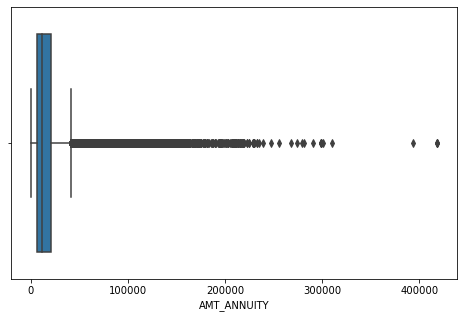

In [50]:
plt.figure(figsize=(8,5))
sns.boxplot(merged_df['AMT_ANNUITY'])
plt.show()

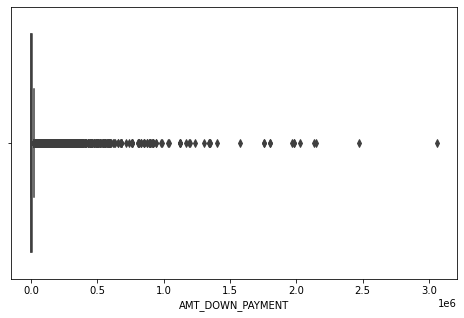

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(merged_df['AMT_DOWN_PAYMENT'])
plt.show()

In [52]:
###mybe if we can drop values ahead of 99th percentile, we will be able to handle the outliers because there are no outliers in lower part
merged_df = merged_df[merged_df['AMT_ANNUITY'] < np.nanpercentile(merged_df['AMT_ANNUITY'], 99)]
merged_df = merged_df[merged_df['AMT_DOWN_PAYMENT'] < np.nanpercentile(merged_df['AMT_DOWN_PAYMENT'], 99)]

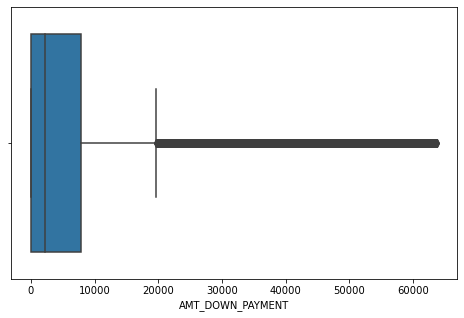

In [53]:
plt.figure(figsize=(8,5))
sns.boxplot(merged_df['AMT_DOWN_PAYMENT'])
plt.show()

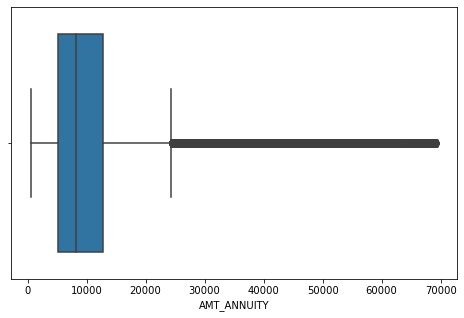

In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(merged_df['AMT_ANNUITY'])
plt.show()

after dropping the values ahead of 99th percentile we have continous data that can be kept for different analysis


# WHETHER PREVIOUSLY APRROVED LOANS WERE PAID OR NOT

WE NEED TO FIND OUT THE DIFFERENCE/PERCENTAGE OF PEOPLE THAT WERE ABLE TO PAY FOR THE CURRENT LOANS THAT WERE PREVIOUSLY APPROVED AND PREVIOUSLY REJECTED

THAT CAN ALSO GIVE US AN INSIGHT ABOUT THE RELIABLITY OF AN INDIVIUAL

In [56]:
##PREVIOUSLY APPROVED BUT HAD DIFFICULITY PAYING CURRENT LOAN

approvals_df = merged_df[merged_df['NAME_CONTRACT_STATUS'] == "Approved"].shape[0]
default_approvals = merged_df[(merged_df['TARGET'] == 1) & (merged_df['NAME_CONTRACT_STATUS'] == "Approved")].shape[0]

print((default_approvals*100/approvals_df))


7.354523610066182


In [57]:
##PREVIOUSLY REJECTED BUT ABLE TO PAY CURRENT LOAN

refusal_df = merged_df[merged_df['NAME_CONTRACT_STATUS'] == "Refused"].shape[0]
nondefault_refused = merged_df[(merged_df['TARGET'] == 0) & (merged_df['NAME_CONTRACT_STATUS'] == "Refused")].shape[0]

print((nondefault_refused*100/refusal_df))

90.18283846699349


-people having difficulties paying current loan that were previously approved:7.3%
-people who paid current loans on time while they were previously rejected:90%

In [ ]:
###percentage of people paying current loan is more for previously approved loans(i.e93%) than previously rejected
###and it can also give bank insights like even if some people's loan were rejected last time still 90% of them were able to pay
###hence one more criteria to increase there profitabilty by providing them loan as well

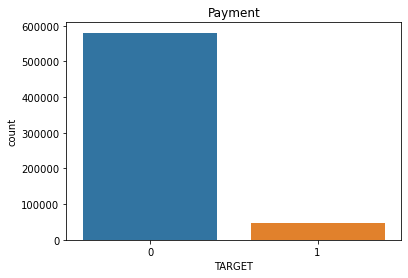

In [58]:
plt.title("Payment")
sns.countplot(merged_df['TARGET'])
plt.show()
##this shows that number of people who defaulted in payment of loan is very less
##thus stated as IMBALANCED DATA
##because we need to find out the max number of people that were unable to pay the loan back 
##and major part is for people who paid hence we will not be able to get a much more anticipitated solution

# THE UNIVARIATE, MULTI-VARIATE AND BI-VARIATE ANALYSIS

In [59]:
##AS LOOKING IN DATA SET COLUMNS DESCRIPTION 
##WE HAVE TWO COLUMNS WHOSE VALUES CAN DEORGANIZE THE OUTPUT
## 1. FLAG_LAST_APPL_PER_CONTRACT:Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract
## 2.NFLAG_LAST_APPL_IN_DAY:Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice
## LET'S FIRST CHECK THE NUMBER OF VALUES STORED IN EACH COLUMN

In [60]:
print(merged_df.FLAG_LAST_APPL_PER_CONTRACT.value_counts())
print(merged_df.NFLAG_LAST_APPL_IN_DAY.value_counts())

Y    628193
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64
1.0    627967
0.0       226
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64


In [61]:
#FLAG_LAST_APPL_PER_CONTRACT can be dropped as it has only fixed values
#NFLAG_LAST_APPL_IN_DAY as the data is highly imbalanced

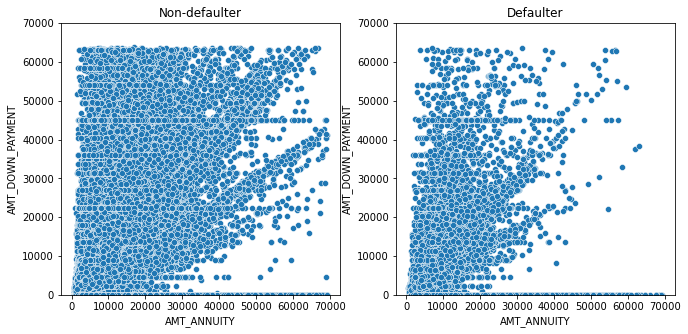

In [64]:
fig = plt.figure(figsize=(11,5))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,70000), title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,70000), title="Defaulter")

sns.scatterplot(merged_df[merged_df["TARGET"] == 0]['AMT_ANNUITY'], merged_df[merged_df["TARGET"] == 0]['AMT_DOWN_PAYMENT'], ax=ax1)
sns.scatterplot(merged_df[merged_df["TARGET"] == 1]['AMT_ANNUITY'], merged_df[merged_df["TARGET"] == 1]['AMT_DOWN_PAYMENT'], ax=ax2)

plt.show()

In [65]:
##AS WE CAN SEE ABOVE IN THE SCATTER PLOT SHOWS THE RELATION BETWEEN ANNUITY AMOUNT AND DOWN PAYMENT AMOUNT OF A YEAR
##FOR HIGHER DOWN PAYMENT DEFAULTER CASES ARE LESS AS PER THE PACKING
##SAME FOR LARGER AMOUNT OF ANNUITY

In [69]:
##THIS IS FOR NON DEFAULTERS
merged_df[merged_df["TARGET"] == 0]['RATE_DOWN_PAYMENT'].quantile([0.25,0.5, 0.7, 0.9, 0.95, 0.99])

0.25    0.000000
0.50    0.091255
0.70    0.108909
0.90    0.211895
0.95    0.282832
0.99    0.498074
Name: RATE_DOWN_PAYMENT, dtype: float64

In [70]:
##THIS IS FOR DEFAULTERS
merged_df[merged_df["TARGET"] == 1]['RATE_DOWN_PAYMENT'].quantile([0.25,0.5, 0.7, 0.9, 0.95, 0.99])

0.25    0.000000
0.50    0.017238
0.70    0.104260
0.90    0.199685
0.95    0.232643
0.99    0.454294
Name: RATE_DOWN_PAYMENT, dtype: float64

BOXPLOT FOR BOTH OF THESE FEATURES

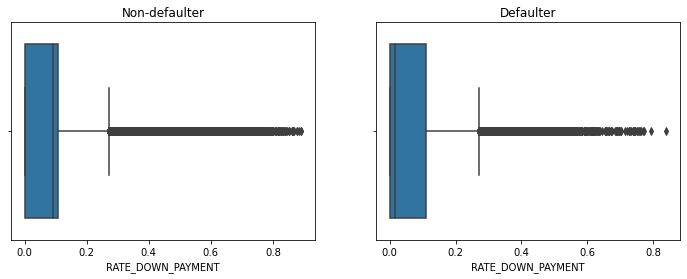

In [68]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")
sns.boxplot(merged_df[merged_df["TARGET"] == 0]['RATE_DOWN_PAYMENT'], ax=ax1)
sns.boxplot(merged_df[merged_df["TARGET"] == 1]['RATE_DOWN_PAYMENT'], ax=ax2)
plt.show()

FOR THE PEOPLE WHOSE RATE OF DOWN PAYMENT WERE LESS CAN BE FOUND IN DEFAULTERS LIST

DENIAL REASNONS FOR MOST OF THE LOANS

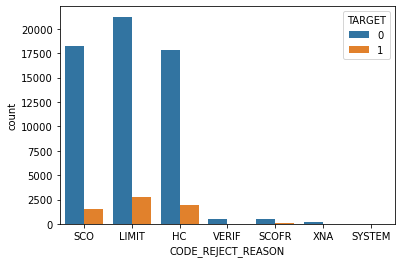

In [71]:
sns.countplot(merged_df[merged_df['NAME_CONTRACT_STATUS'] == "Refused"]["CODE_REJECT_REASON"], hue=merged_df.TARGET)
plt.show()

In [72]:
##MOST OF THE COMMON WERE SCO,LIMIT AND HC 
##NEED MORE CLARIFICATION ON THERE MEANINGS

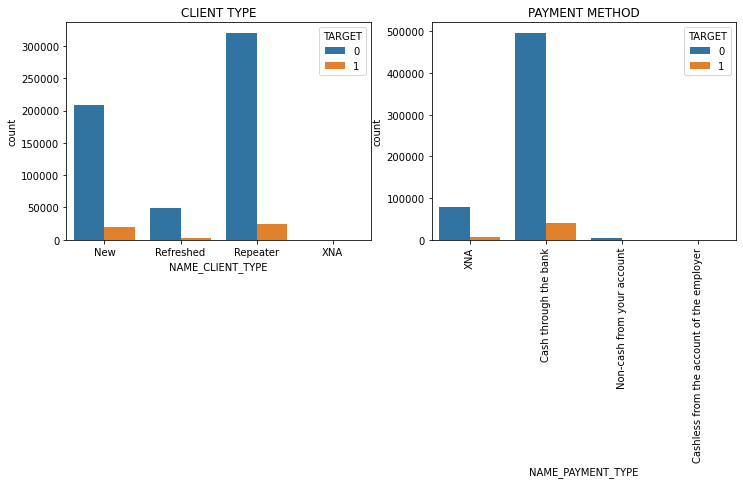

In [74]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1, 2, 1, title="CLIENT TYPE")
ax2 = fig.add_subplot(1, 2, 2, title="PAYMENT METHOD")
sns.countplot(merged_df['NAME_CLIENT_TYPE'], hue=merged_df['TARGET'], ax=ax1)
sns.countplot(merged_df['NAME_PAYMENT_TYPE'], hue=merged_df['TARGET'], ax=ax2)
plt.xticks(rotation=90)
plt.show()
##SINCE WE ARE UNABLE TO SEE THE X AXIS COLUMNS NEED TO ADD ROTATION FUNCTION

In [75]:
##THE MOST OF THE CLIENTS ARE REPEATED AND THE MOST USED PAYMENT METHOD IS CASH THROUGH BANK

In [80]:
##to know for which items the loans were taken the most


def loan_items(df, col):
    new_df = pd.DataFrame(columns=['items', 'Percentage'])
    
    for items in df[col].unique():
        default_df = df[(df[col] == items) & (df.TARGET == 1)].shape[0]
        total_df = df[df[col] == items].shape[0]
        new_df = new_df.append({'items' : items , 'Percentage' : (default_df*100/total_df)}, ignore_index=True)
    return new_df.sort_values(by='Percentage', ascending=False)

In [81]:
loan_items(merged_df, 'NAME_GOODS_CATEGORY')

,items,Percentage
23,Insurance,10.526316
0,Vehicles,10.25741
14,Jewelry,9.124951
17,Auto Accessories,9.029763
3,Mobile,8.615336
15,Office Appliances,8.307692
8,Computers,8.074335
20,Weapon,8.064516
21,Direct Sales,8.024691
5,Audio/Video,7.698706


In [82]:
##people who took loan for insurance and vehicels are highest in defaulter case

In [83]:
loan_items(merged_df, 'PRODUCT_COMBINATION')

,items,Percentage
13,Card Street,17.195005
4,POS mobile with interest,8.761056
0,POS other with interest,7.953141
3,POS mobile without interest,7.888514
2,POS household with interest,7.752151
11,POS others without interest,7.256127
15,Card X-Sell,6.666667
5,POS household without interest,6.649376
9,Cash Street: middle,6.475391
10,Cash Street: high,6.417625


In [84]:
##highest default cases are for card street

In [85]:
loan_items(merged_df, 'CHANNEL_TYPE')

,items,Percentage
4,AP+ (Cash loan),15.0
1,Country-wide,7.908171
2,Regional / Local,7.551291
0,Stone,7.294692
3,Credit and cash offices,6.124197
5,Contact center,4.545455
6,Car dealer,0.0


In [86]:
##highest default cases are for AP+(cash loan)